# Introduction

In this project, by using data mining and machine learning methods, we tried to design a system to predict diabetes.
In the aforementioned dataset, we have used the indicators Gender, Age, Race, Education, Marital Status,Occupation, Weight ,Height ,BMI ,Systolic blood pressure, Diastolic blood pressure, Direct cholesterol, Total cholesterol and Physical activity to learn our model.


Dataset from : https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey

# Starting (Getting data &  Normalization‌)

First, we call the libraries we need.
We use pandas, numpy, sklearn, matplotlib and seborn libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import copy


Some warnings cause clutter in our environment that we ignore them.

In [2]:
import warnings
warnings.filterwarnings('ignore')

Then we read our data with pandas structure.

In [3]:
dataset1 = pd.read_csv('NHANES.csv')


One of the ways to reduce the data dimensions and clean the data is to remove the columns that we do not need:

**Data cleaning and dimensionality reduction**

In [4]:

#Here, because we have little processing power, we had to delete some data.
dataset2=dataset1.drop(dataset1.index[500:10001])

#Here, we are going to delete the columns that we don't need.
dataset3=dataset2[["Gender",'Age','Race1','Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive','Diabetes']]

#Now we set the main dataset equal to the values we want.
dataset=copy.deepcopy(dataset3)

dataset.head()

,Gender,Age,Race1,Education,MaritalStatus,Work,Weight,Height,BMI,BPSysAve,BPDiaAve,DirectChol,TotChol,PhysActive,Diabetes
0,male,34,White,High School,Married,NotWorking,87.4,164.7,32.22,113.0,85.0,1.29,3.49,No,No
1,male,34,White,High School,Married,NotWorking,87.4,164.7,32.22,113.0,85.0,1.29,3.49,No,No
2,male,34,White,High School,Married,NotWorking,87.4,164.7,32.22,113.0,85.0,1.29,3.49,No,No
3,male,4,Other,NaN,NaN,NaN,17.0,105.4,15.30,NaN,NaN,NaN,NaN,NaN,No
4,female,49,White,Some College,LivePartner,NotWorking,86.7,168.4,30.57,112.0,75.0,1.16,6.70,No,No


In [5]:
# Data Dimensions
dataset.shape

(500, 15)

**Check the data structure**

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         500 non-null    object 
 1   Age            500 non-null    int64  
 2   Race1          500 non-null    object 
 3   Education      391 non-null    object 
 4   MaritalStatus  391 non-null    object 
 5   Work           423 non-null    object 
 6   Weight         494 non-null    float64
 7   Height         483 non-null    float64
 8   BMI            482 non-null    float64
 9   BPSysAve       460 non-null    float64
 10  BPDiaAve       460 non-null    float64
 11  DirectChol     458 non-null    float64
 12  TotChol        458 non-null    float64
 13  PhysActive     442 non-null    object 
 14  Diabetes       490 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 58.7+ KB


Here we see that some of our records have undefined values. We have different ways to standardize here. As a solution, we can completely remove those rows so that the data we want to use for various purposes is standardized Or we can replace them with mean or median.

We give a brief overview of the structure of our data set:

In [7]:
dataset.isnull().sum()

Gender             0
Age                0
Race1              0
Education        109
MaritalStatus    109
Work              77
Weight             6
Height            17
BMI               18
BPSysAve          40
BPDiaAve          40
DirectChol        42
TotChol           42
PhysActive        58
Diabetes          10
dtype: int64

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,40.232000,21.378031,0.00,24.000,42.00,56.0000,80.00
Weight,494.0,76.101822,28.613248,4.50,60.325,75.70,91.6500,230.70
Height,483.0,164.624431,15.790500,88.30,158.650,165.80,175.5000,192.60
BMI,482.0,28.062033,7.764025,12.89,22.820,27.03,32.3175,81.25
BPSysAve,460.0,119.032609,17.731016,80.00,108.000,117.00,127.0000,191.00
BPDiaAve,460.0,67.795652,12.810908,0.00,62.000,69.00,76.0000,100.00
DirectChol,458.0,1.364585,0.444119,0.52,1.030,1.29,1.6000,3.44
TotChol,458.0,4.908210,1.019321,2.38,4.160,4.84,5.5900,8.82


According to what I had read, in this model of projects, deleting data is one of the worst things. Then I use the average value.

Of course, we should know that NaN values in the Diabetes column are not useful for us. Because this is our dependent variable. So we delete the rows in which diabetes has no value.

**Replace undefined values**

In [9]:
dataset_new=dataset
dataset_new = dataset_new.dropna(subset=['Diabetes'])



We also consider that our data has zero values in some columns, which we consider as undefined.

In [10]:
dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']] = dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']].replace(0, np.NaN) 

#Now we count undefined values again
dataset_new.isnull().sum()

Gender            0
Age               0
Race1             0
Education        99
MaritalStatus    99
Work             67
Weight            6
Height            7
BMI               8
BPSysAve         30
BPDiaAve         32
DirectChol       32
TotChol          32
PhysActive       48
Diabetes          0
dtype: int64

Now we replace other columns with undefined values with the average values of those columns.

In [11]:
dataset_new["Weight"].fillna(dataset_new["Weight"].mean(), inplace = True)
dataset_new["Height"].fillna(dataset_new["Height"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)
dataset_new["BPSysAve"].fillna(dataset_new["BPSysAve"].mean(), inplace = True)
dataset_new["BPDiaAve"].fillna(dataset_new["BPDiaAve"].mean(), inplace = True)
dataset_new["DirectChol"].fillna(dataset_new["DirectChol"].mean(), inplace = True)
dataset_new["TotChol"].fillna(dataset_new["TotChol"].mean(), inplace = True)

dataset_new.isnull().sum()

Gender            0
Age               0
Race1             0
Education        99
MaritalStatus    99
Work             67
Weight            0
Height            0
BMI               0
BPSysAve          0
BPDiaAve          0
DirectChol        0
TotChol           0
PhysActive       48
Diabetes          0
dtype: int64

We also use their mode for discrete values.

In [12]:
dataset_new["PhysActive"].fillna(dataset_new["PhysActive"].mode()[0], inplace = True)
dataset_new["Education"].fillna(dataset_new["Education"].mode()[0], inplace = True)
dataset_new["MaritalStatus"].fillna(dataset_new["MaritalStatus"].mode()[0], inplace = True)
dataset_new["Work"].fillna(dataset_new["Work"].mode()[0], inplace = True)


dataset_new.isnull().sum()

Gender           0
Age              0
Race1            0
Education        0
MaritalStatus    0
Work             0
Weight           0
Height           0
BMI              0
BPSysAve         0
BPDiaAve         0
DirectChol       0
TotChol          0
PhysActive       0
Diabetes         0
dtype: int64

In [13]:
dataset=copy.deepcopy(dataset_new)

We have done the data cleaning step successfully.

# Data Visualization

In this section, we want to illustrate our data for a more detailed examination. We use Matplotlib and Seaborn libraries for this.
Here we ask some questions and find the answer with different diagrams.

What is the difference between the race of people who are diabetes positive and those who are diabetes negative?

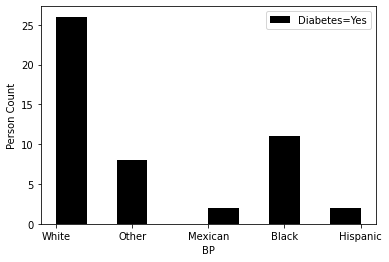

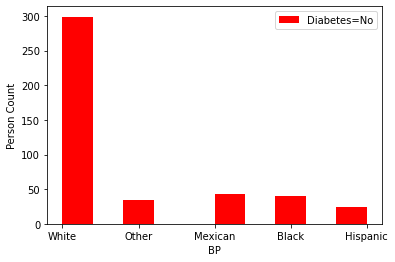

In [14]:
import matplotlib.pyplot as plt

YesDia = dataset_new['Diabetes'].values == 'Yes'
NoDia = dataset_new['Diabetes'].values == 'No'
YesDia=dataset_new[YesDia]
NoDia=dataset_new[NoDia]
 
Race1 = YesDia['Race1'].tolist()
Race0 = NoDia['Race1'].tolist()

plt.hist([Race1], color=[
         'Black'], label=['Diabetes=Yes'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

plt.hist([Race0], color=[
         'Red'], label=['Diabetes=No'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

Do most diabetics have little physical activity?

<AxesSubplot:xlabel='PhysActive', ylabel='count'>

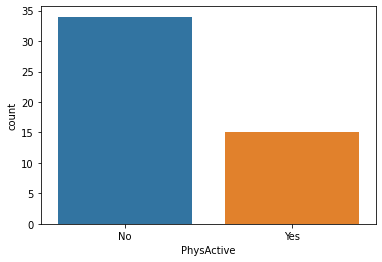

In [15]:
sns.countplot(x = 'PhysActive',data = YesDia)


<AxesSubplot:xlabel='PhysActive', ylabel='count'>

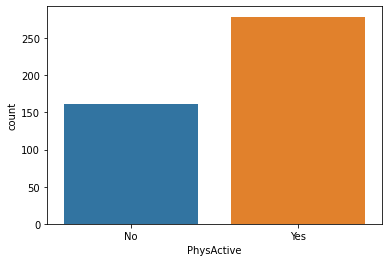

In [16]:
sns.countplot(x = 'PhysActive',data = NoDia)

**Lineplot**

<AxesSubplot:xlabel='Age', ylabel='Diabetes'>

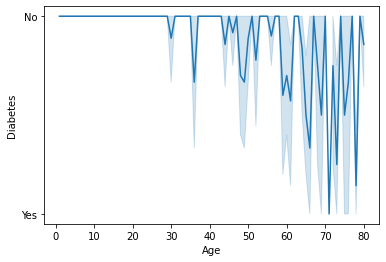

In [17]:
sns.lineplot(x="Age", y="Diabetes", data=dataset_new)

**Scatter matrix**

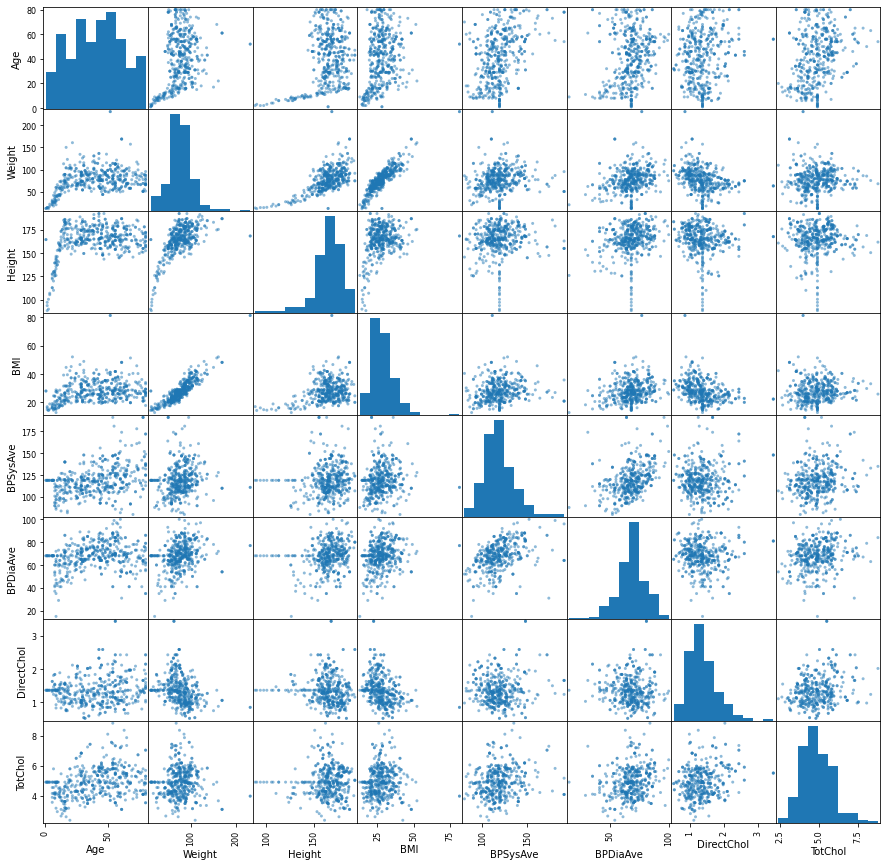

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(dataset , figsize=(15, 15))
plt.show()

**Distribution plots**

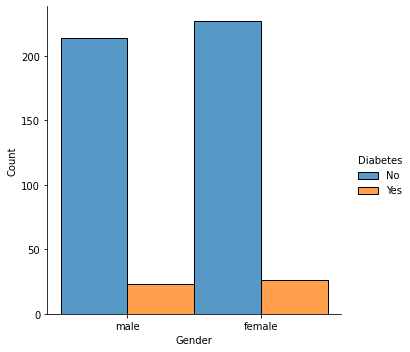

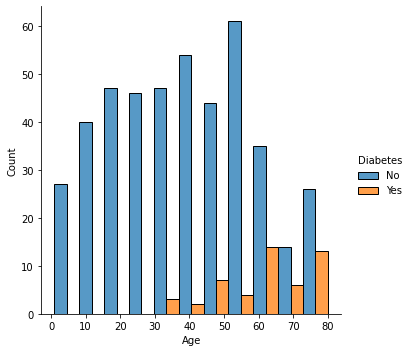

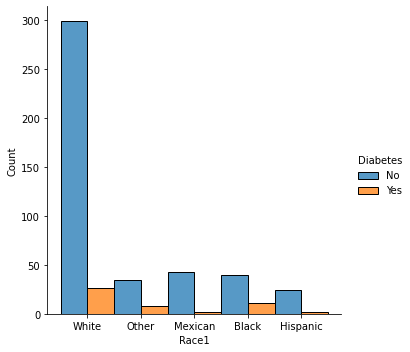

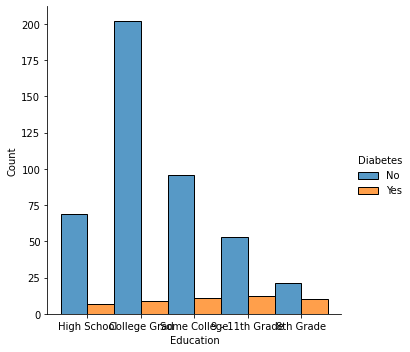

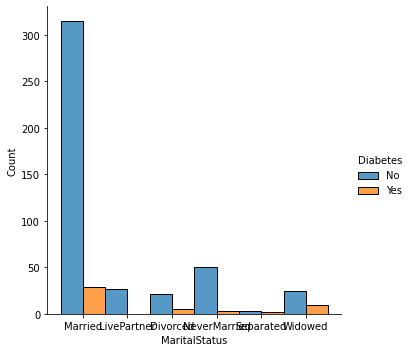

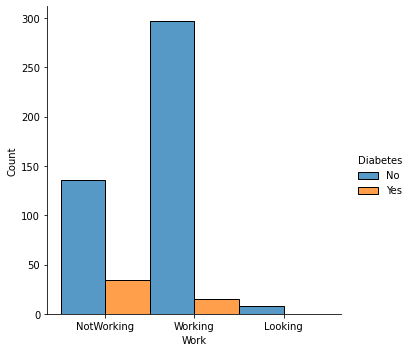

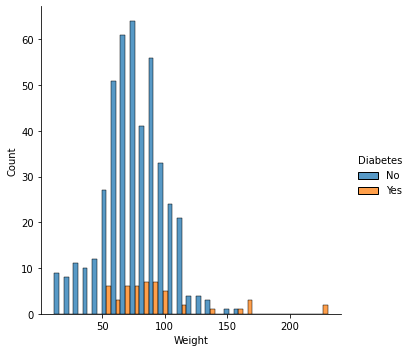

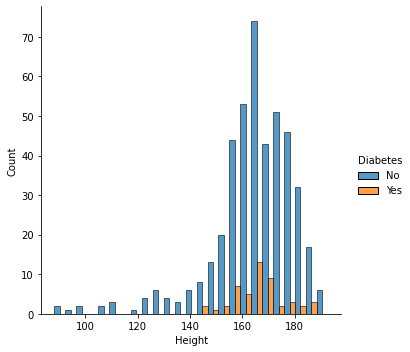

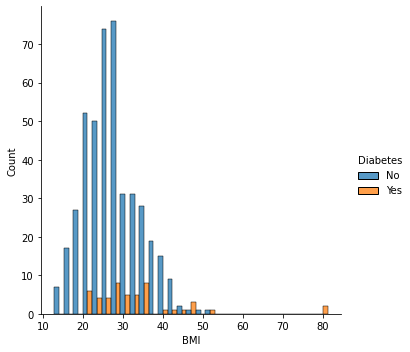

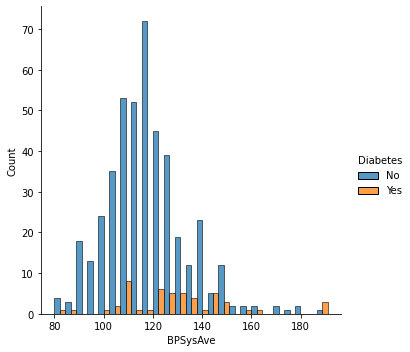

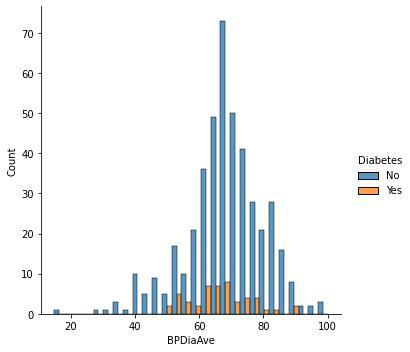

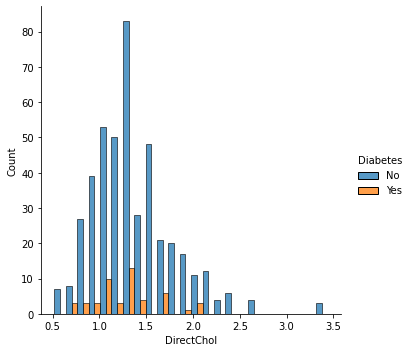

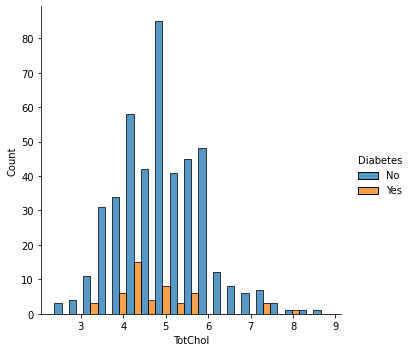

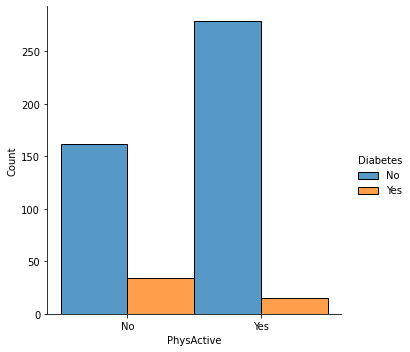

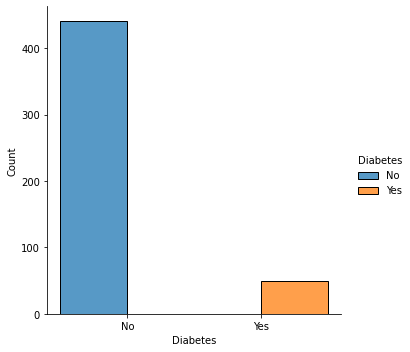

In [19]:
for i in dataset_new.columns:
    sns.displot(dataset, x=i,multiple="dodge",hue="Diabetes")
    

**Pair plot**

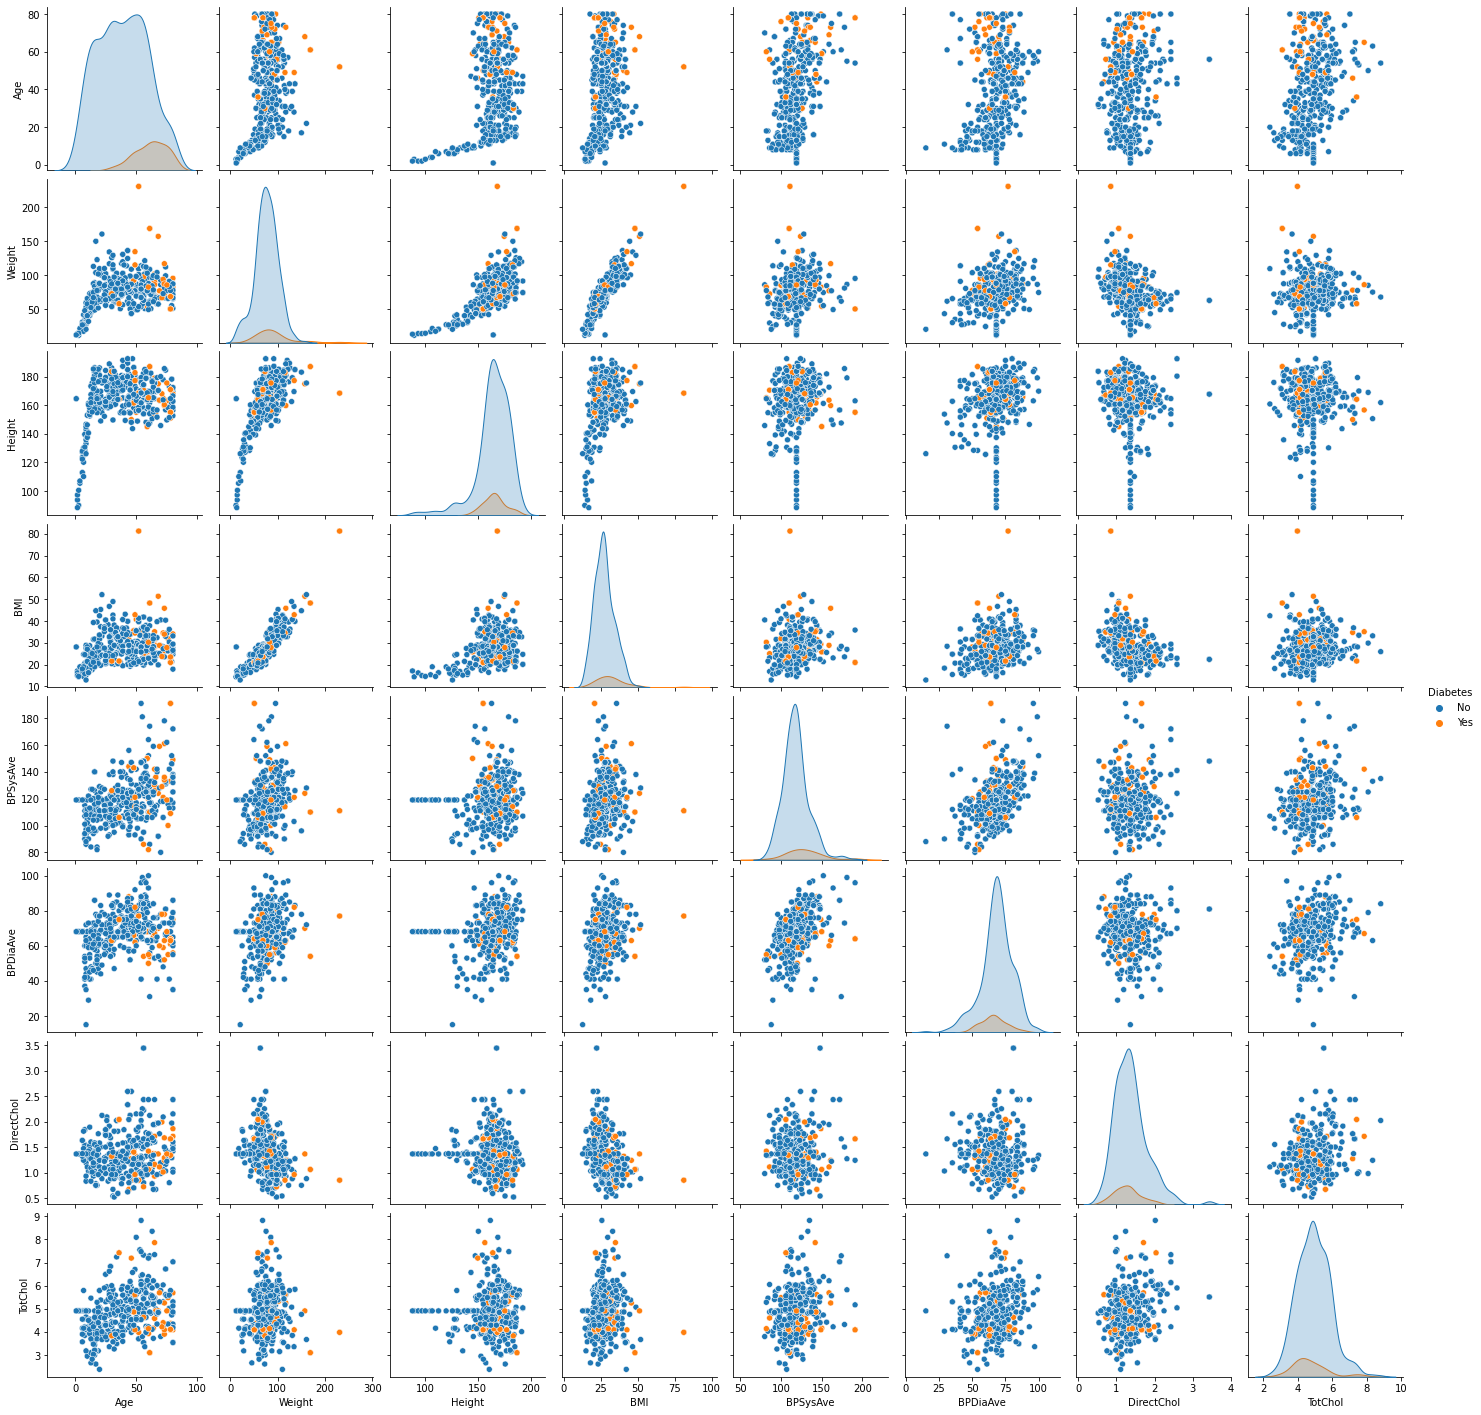

In [20]:
sns.pairplot(data = dataset, hue = 'Diabetes')
plt.show()

**Plot correlation matrix (Clustermap)**

In [21]:

import matplotlib.pyplot as plt
import numpy as np
 

#Converting dataset_new into a panda dataframe
df = dataset_new
corr = df.corr()

# Displaying dataframe of correlation values
corr.style.background_gradient(cmap ='coolwarm')

,Age,Weight,Height,BMI,BPSysAve,BPDiaAve,DirectChol,TotChol
Age,1.000000,0.307661,0.299004,0.261223,0.389707,0.210050,0.145327,0.303314
Weight,0.307661,1.000000,0.632260,0.897115,0.138612,0.271682,-0.326217,0.009441
Height,0.299004,0.632260,1.000000,0.302768,0.098079,0.224747,-0.105020,0.028114
BMI,0.261223,0.897115,0.302768,1.000000,0.123346,0.223039,-0.336031,0.025430
BPSysAve,0.389707,0.138612,0.098079,0.123346,1.000000,0.406079,0.069904,0.173444
BPDiaAve,0.210050,0.271682,0.224747,0.223039,0.406079,1.000000,-0.026389,0.210791
DirectChol,0.145327,-0.326217,-0.105020,-0.336031,0.069904,-0.026389,1.000000,0.221222
TotChol,0.303314,0.009441,0.028114,0.025430,0.173444,0.210791,0.221222,1.000000


# Algorithms

Here we process and standardize the data so that we can finally build different models with them.

**Dummy variable**

According to what we learned in the data mining course, in many models including logistic regression, we cannot have nominal discrete data. Dummy variables are a solution that can be effective to convert them into binary variables (by expanding the columns).



In [22]:

df3 = dataset_new.copy()
# These columns must be converted
df3 = pd.get_dummies(df3,columns = ['Gender', 'Race1','Education','MaritalStatus','Work','PhysActive','Diabetes'], drop_first = True)
print(df3.columns)
dataset_new=df3.copy()

Index(['Age', 'Weight', 'Height', 'BMI', 'BPSysAve', 'BPDiaAve', 'DirectChol',
       'TotChol', 'Gender_male', 'Race1_Hispanic', 'Race1_Mexican',
       'Race1_Other', 'Race1_White', 'Education_9 - 11th Grade',
       'Education_College Grad', 'Education_High School',
       'Education_Some College', 'MaritalStatus_LivePartner',
       'MaritalStatus_Married', 'MaritalStatus_NeverMarried',
       'MaritalStatus_Separated', 'MaritalStatus_Widowed', 'Work_NotWorking',
       'Work_Working', 'PhysActive_Yes', 'Diabetes_Yes'],
      dtype='object')


Now we see the result:

In [23]:
dataset_new.head()

,Age,Weight,Height,BMI,BPSysAve,BPDiaAve,DirectChol,TotChol,Gender_male,Race1_Hispanic,...,Education_Some College,MaritalStatus_LivePartner,MaritalStatus_Married,MaritalStatus_NeverMarried,MaritalStatus_Separated,MaritalStatus_Widowed,Work_NotWorking,Work_Working,PhysActive_Yes,Diabetes_Yes
0,34,87.4,164.7,32.22,113.000000,85.000000,1.290000,3.49000,1,0,...,0,0,1,0,0,0,1,0,0,0
1,34,87.4,164.7,32.22,113.000000,85.000000,1.290000,3.49000,1,0,...,0,0,1,0,0,0,1,0,0,0
2,34,87.4,164.7,32.22,113.000000,85.000000,1.290000,3.49000,1,0,...,0,0,1,0,0,0,1,0,0,0
3,4,17.0,105.4,15.30,119.032609,68.091703,1.364585,4.90821,1,0,...,0,0,1,0,0,0,0,1,1,0
4,49,86.7,168.4,30.57,112.000000,75.000000,1.160000,6.70000,0,0,...,1,1,0,0,0,0,1,0,0,0


**Preprocessing & Data Spliting**

This is one of the most important parts of our project. We must select the columns that we want to use as X and Y in the models. Then, according to the standards, 25% of the rows should randomly contain our test data, and the rest will be used for learning.

In [24]:
# Selecting X & Y
X = dataset_new.iloc[:, :-1].values
Y = dataset_new.iloc[:, -1].values



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.25, random_state = 0)






Most machine learning algorithms use Euclidean distance for their estimates. For this reason, if some samples have too much or too little value, the accuracy of the modeling will decrease. Data scaling is used to solve this problem.


In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

This step was the last step of data preprocessing. Now we can inject our data into machine learning algorithms.

In [26]:
# Checking dimensions
print("XTrain shape:", XTrain.shape)
print("XTest shape:", XTest.shape)
print("YTrain shape:", YTrain.shape)
print("YTest shape:", YTest.shape)

XTrain shape: (367, 25)
XTest shape: (123, 25)
YTrain shape: (367,)
YTest shape: (123,)


We create logistic regression and random tree forest models:

**Logistic regresion**

In [27]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(XTrain, YTrain)


LogisticRegression(random_state=0)

**Random forest**

In [28]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 15, random_state = 0)
ranfor.fit(XTrain, YTrain)

RandomForestClassifier(n_estimators=15, random_state=0)

# Scoring

In this section, we must evaluate how reliable our models are.

In [29]:
#In the models, we put test data to make predictions for us.

YPredictionRegres = logreg.predict(XTest)
YP_RandomF = ranfor.predict(XTest)

Now we measure the error rate of the Predictors:

In [30]:
from sklearn.metrics import accuracy_score

ACC_LOG_Regres = accuracy_score(YTest, YPredictionRegres)
print("Logistic Regression: " + str(ACC_LOG_Regres * 100))

ACC_Random_F = accuracy_score(YTest, YP_RandomF)
print("Random Forest: " + str(ACC_Random_F * 100))

Logistic Regression: 89.43089430894308
Random Forest: 94.3089430894309


We draw the correlation matrix for better understanding:

[[103   7]
 [  6   7]]


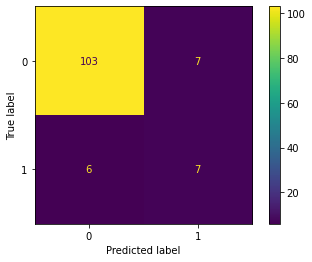

In [31]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(YTest, YPredictionRegres, labels=None)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Classification report (for main classification metrics) :

In [32]:

from sklearn.metrics import classification_report
print(classification_report(YTest, YPredictionRegres))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       110
           1       0.50      0.54      0.52        13

    accuracy                           0.89       123
   macro avg       0.72      0.74      0.73       123
weighted avg       0.90      0.89      0.90       123



Just for future tools

In [33]:
'''

TempX=[33,93.8,181.3,28.54,128.0,74.0,0.91,5.59,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0]
TempXnpArr=np.array(nnp) 
TempXnpArr=TempXnpArr.reshape(1,-1)
Answer=logreg.predict(TempXnpArr)
print(Answer)

''' 

'\n\nTempX=[33,93.8,181.3,28.54,128.0,74.0,0.91,5.59,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0]\nTempXnpArr=np.array(nnp) \nTempXnpArr=TempXnpArr.reshape(1,-1)\nAnswer=logreg.predict(TempXnpArr)\nprint(Answer)\n\n'